In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import LabelEncoder

In [2]:
#Importing file
movies = pd.read_csv("D:\CODSOFT\IMDb Movies India.csv",encoding='latin-1')

In [3]:
#Our dataset
movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


## NOW WE WILL FIRST CLEAN THE DATA

In [4]:
#Removing extras from Title
def clean_title(Name):
    return re.sub("[^a-zA-Z0-9 ]","",Name)
movies["New_Name"] = movies["Name"].apply(clean_title)

In [5]:
#Removing extras from Year
def clean_year(year):
    return re.sub("[^0-9 ]","",str(year))
movies["New_Year"] = movies["Year"].apply(clean_year)

In [6]:
movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,New_Name,New_Year
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,,
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Gadhvi He thought he was Gandhi,2019
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Homecoming,2021
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Yaaram,2019
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,And Once Again,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,Zulm Ko Jala Doonga,1988
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Zulmi,1999
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN,Zulmi Raj,2005
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,Zulmi Shikari,1988


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
 10  New_Name  15509 non-null  object 
 11  New_Year  15509 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.4+ MB


In [8]:
movies[movies['Name'] == ' ']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,New_Name,New_Year
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,,


In [9]:
movies.drop(0, axis = 0, inplace=True)

In [10]:
movies.isnull().sum().sort_values(ascending=False)/len(movies)*100

Duration    53.314418
Rating      48.936033
Votes       48.929585
Actor 3     20.273407
Actor 2     15.372711
Genre       12.103430
Actor 1     10.426876
Year         3.398246
Director     3.385349
Name         0.000000
New_Name     0.000000
New_Year     0.000000
dtype: float64

In [11]:
movies = movies[movies['Duration'].notnull()]

In [12]:
movies.isnull().sum().sort_values(ascending=False)/len(movies)*100

Rating      19.185083
Votes       19.185083
Actor 3      7.582873
Actor 2      5.649171
Actor 1      3.646409
Genre        2.582873
Year         1.726519
Director     0.193370
Name         0.000000
Duration     0.000000
New_Name     0.000000
New_Year     0.000000
dtype: float64

In [13]:
movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,New_Name,New_Year
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Gadhvi He thought he was Gandhi,2019
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Homecoming,2021
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Yaaram,2019
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,And Once Again,2010
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Aur Pyaar Ho Gaya,1997
...,...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,Zubaan,2015
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,Zubeidaa,2001
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Zulm Ki Zanjeer,1989
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Zulmi,1999


In [14]:
movies = movies.drop('Votes', axis = 1)

In [15]:
movies.isnull().sum().sort_values(ascending=False)/len(movies)*100

Rating      19.185083
Actor 3      7.582873
Actor 2      5.649171
Actor 1      3.646409
Genre        2.582873
Year         1.726519
Director     0.193370
Name         0.000000
Duration     0.000000
New_Name     0.000000
New_Year     0.000000
dtype: float64

In [16]:
movies = movies[movies['Year'].notnull()]
movies = movies[movies['Genre'].notnull()]

In [17]:
movies.isnull().sum().sort_values(ascending=False)/len(movies)*100

Rating      16.041546
Actor 3      7.025389
Actor 2      5.222158
Actor 1      3.390075
Director     0.187536
Name         0.000000
Year         0.000000
Duration     0.000000
Genre        0.000000
New_Name     0.000000
New_Year     0.000000
dtype: float64

In [18]:
movies

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,New_Name,New_Year
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Gadhvi He thought he was Gandhi,2019
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Homecoming,2021
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Yaaram,2019
4,...And Once Again,(2010),105 min,Drama,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,And Once Again,2010
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Aur Pyaar Ho Gaya,1997
...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,Zubaan,2015
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,Zubeidaa,2001
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Zulm Ki Zanjeer,1989
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Zulmi,1999


In [19]:
movies.Rating.fillna(movies['Rating'].mode().max(),inplace=True)

In [20]:
movies.isnull().sum().sort_values(ascending=False)/len(movies)*100

Actor 3     7.025389
Actor 2     5.222158
Actor 1     3.390075
Director    0.187536
Name        0.000000
Year        0.000000
Duration    0.000000
Genre       0.000000
Rating      0.000000
New_Name    0.000000
New_Year    0.000000
dtype: float64

In [21]:
movies = movies[(movies['Actor 3'].notnull()) & (movies['Actor 2'].notnull()) & (movies['Actor 1'].notnull())]

In [22]:
movies.isnull().sum().sort_values(ascending=False)/len(movies)*100

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
New_Name    0.0
New_Year    0.0
dtype: float64

In [23]:
int(movies['Duration'][10].split(" ")[0])

96

In [24]:
def clean_dur(dur):
    return int(dur.split(" ")[0])
movies["Duration"] = movies["Duration"].apply(clean_dur)

C:\Users\Rishith Vadher\AppData\Local\Temp\ipykernel_4568\1179204862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["Duration"] = movies["Duration"].apply(clean_dur)


In [25]:
#All our unnecessary and empty data are either been removed or filled in with average value
movies

,Name,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,New_Name,New_Year
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Gadhvi He thought he was Gandhi,2019
2,#Homecoming,(2021),90,"Drama, Musical",6.8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Homecoming,2021
3,#Yaaram,(2019),110,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Yaaram,2019
4,...And Once Again,(2010),105,Drama,6.8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,And Once Again,2010
5,...Aur Pyaar Ho Gaya,(1997),147,"Comedy, Drama, Musical",4.7,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Aur Pyaar Ho Gaya,1997
...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115,Drama,6.1,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,Zubaan,2015
15494,Zubeidaa,(2001),153,"Biography, Drama, History",6.2,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,Zubeidaa,2001
15503,Zulm Ki Zanjeer,(1989),125,"Action, Crime, Drama",5.8,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Zulm Ki Zanjeer,1989
15505,Zulmi,(1999),129,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Zulmi,1999


In [26]:
#Removing duplicate values
movies = movies.drop_duplicates(keep = 'first')

## Visualizing our data

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

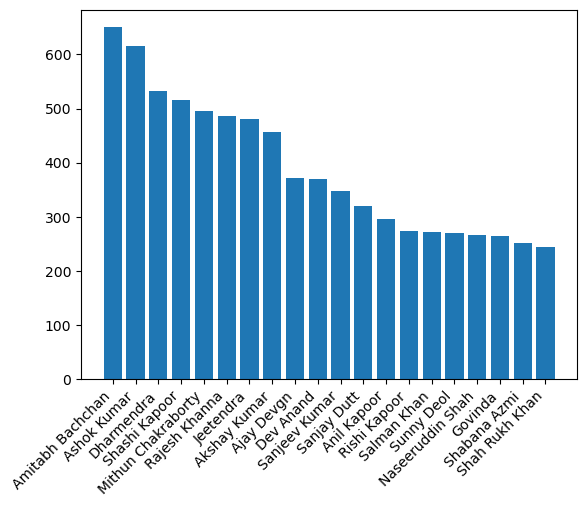

In [27]:
top_rated_actor1 = movies.groupby('Actor 1').sum().sort_values('Rating', ascending=False).head(20)
plt.bar(top_rated_actor1.index,top_rated_actor1['Rating'])
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

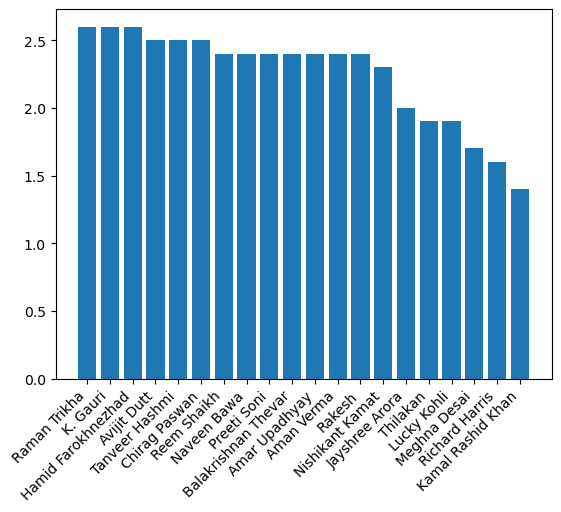

In [28]:
top_rated_actor1 = movies.groupby('Actor 1').sum().sort_values('Rating', ascending=False).tail(20)
plt.bar(top_rated_actor1.index,top_rated_actor1['Rating'])
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

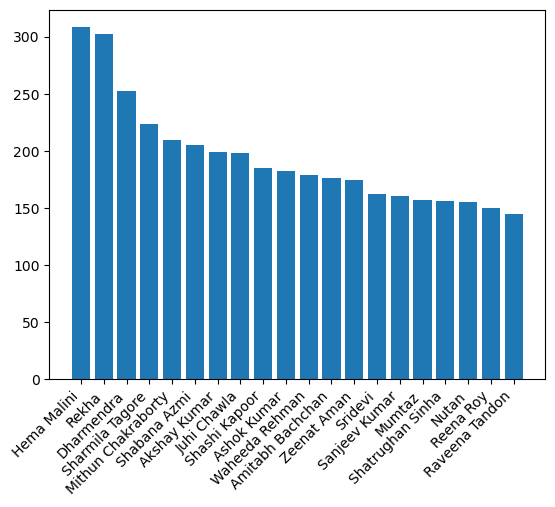

In [29]:
top_rated_actor1 = movies.groupby('Actor 2').sum().sort_values('Rating', ascending=False).head(20)
plt.bar(top_rated_actor1.index,top_rated_actor1['Rating'])
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

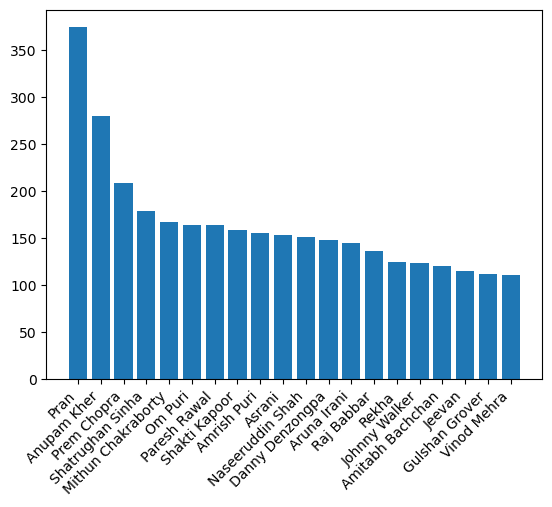

In [30]:
top_rated_actor1 = movies.groupby('Actor 3').sum().sort_values('Rating', ascending=False).head(20)
plt.bar(top_rated_actor1.index,top_rated_actor1['Rating'])
plt.xticks(rotation=45, ha='right')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

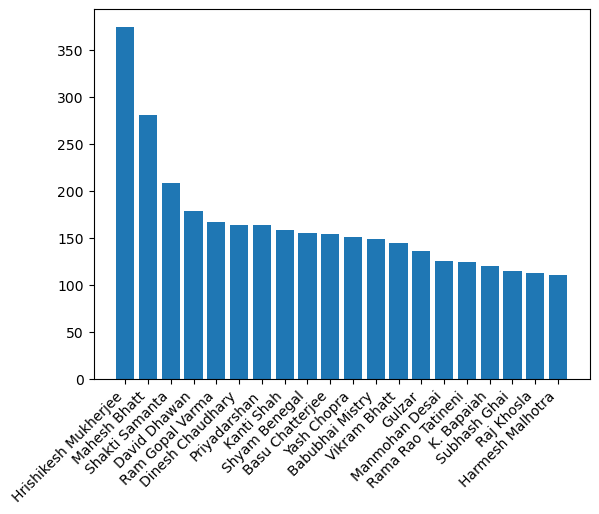

In [31]:
top_rated_director = movies.groupby('Director').sum().sort_values('Rating', ascending=False).head(20)
plt.bar(top_rated_director.index,top_rated_actor1['Rating'])
plt.xticks(rotation=45, ha='right')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

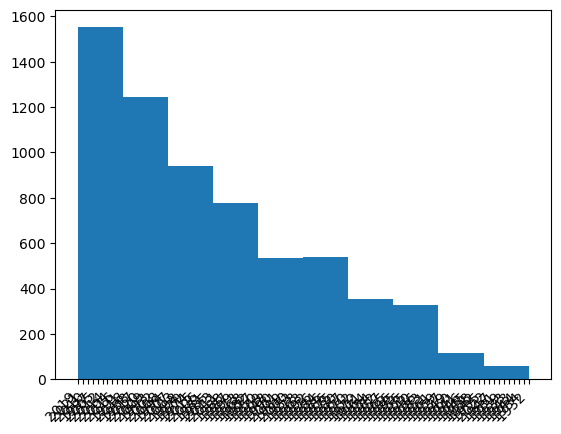

In [32]:
plt.hist(movies['New_Year'])
plt.xticks(rotation=45, ha='right')

(array([  18.,  115.,  318.,  659.,  979., 1329., 2262.,  655.,   95.,
          14.]),
 array([ 1.1 ,  1.99,  2.88,  3.77,  4.66,  5.55,  6.44,  7.33,  8.22,
         9.11, 10.  ]),
 <BarContainer object of 10 artists>)

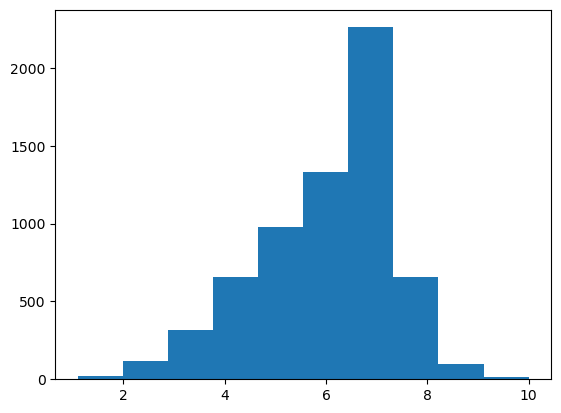

In [33]:
plt.hist(movies['Rating'])

In [34]:
movies.isnull().sum().sort_values(ascending=False)/len(movies)*100

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
New_Name    0.0
New_Year    0.0
dtype: float64

In [62]:
X = movies.drop(['Name','Year','Rating','Actor 3','New_Name','New_Year'], axis = 1)
X

,Duration,Genre,Director,Actor 1,Actor 2
1,109,Drama,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande
2,90,"Drama, Musical",Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur
3,110,"Comedy, Romance",Ovais Khan,Prateik,Ishita Raj
4,105,Drama,Amol Palekar,Rajat Kapoor,Rituparna Sengupta
5,147,"Comedy, Drama, Musical",Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan
...,...,...,...,...,...
15493,115,Drama,Mozez Singh,Vicky Kaushal,Sarah Jane Dias
15494,153,"Biography, Drama, History",Shyam Benegal,Karisma Kapoor,Rekha
15503,125,"Action, Crime, Drama",S.P. Muthuraman,Chiranjeevi,Jayamalini
15505,129,"Action, Drama",Kuku Kohli,Akshay Kumar,Twinkle Khanna


In [63]:
y = movies['Rating']
y

1        7.0
2        6.8
3        4.4
4        6.8
5        4.7
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 6444, dtype: float64

## Performing Label Encoding

In [64]:
labelencoder = LabelEncoder()

In [65]:
X["Genre"] = labelencoder.fit_transform(X["Genre"])

In [66]:
X["Director"] = labelencoder.fit_transform(X["Director"])

In [67]:
X["Actor 1"] = labelencoder.fit_transform(X["Actor 1"])

In [68]:
X["Actor 2"] = labelencoder.fit_transform(X["Actor 2"])

In [69]:
X

,Duration,Genre,Director,Actor 1,Actor 2
1,109,241,759,1679,2729
2,90,287,2494,1910,1646
3,110,191,1598,1487,872
4,105,241,195,1591,1985
5,147,163,1836,476,81
...,...,...,...,...,...
15493,115,241,1459,2295,2160
15494,153,138,2452,944,1944
15503,125,28,2142,512,913
15505,129,38,1231,140,2593


## Training and Testing

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=20)

In [72]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor().fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

mse = mean_squared_error(y_test, dt_pred)
r2 = r2_score(y_test, dt_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.107931747673216
R-squared: -0.7500423334165025


In [73]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor().fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.6241921619658448
R-squared: 0.08543517946573442


In [74]:
#Linear Regression
lr_model = LinearRegression().fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, lr_pred)
r2 = r2_score(y_test, lr_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.741276824069704
R-squared: 0.019506088381632147


In [75]:
#Ridge model
from sklearn.linear_model import Ridge
rd_model = Ridge().fit(X_train, y_train)
rd_pred = rd_model.predict(X_test)

mse = mean_squared_error(y_test, rd_pred)
r2 = r2_score(y_test, rd_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.7412768245403725
R-squared: 0.019506088116603926


In [76]:
#Extra Tree Regressor
from sklearn.ensemble import ExtraTreesRegressor
et_model = ExtraTreesRegressor().fit(X_train, y_train)
et_pred = et_model.predict(X_test)

mse = mean_squared_error(y_test, et_pred)
r2 = r2_score(y_test, et_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.6938789446742502
R-squared: 0.04619531523428555


## Prediction

In [77]:
X.iloc[300]

Duration     122
Genre        241
Director    2142
Actor 1     1618
Actor 2     2415
Name: 650, dtype: int64

In [78]:
y.iloc[300]

5.5

In [80]:
values = pd.DataFrame(np.array([122,241,2142,1618,2415]).reshape(1,-1), columns=['Duration','Genre','Director','Actor 1','Actor 2'])
user_pred = dt_model.predict(values)
print(user_pred)

[3.1]


In [82]:
values = pd.DataFrame(np.array([122,241,2142,1618,2415]).reshape(1,-1), columns=['Duration','Genre','Director','Actor 1','Actor 2'])
user_pred = rf_model.predict(values)
print(user_pred)

[5.554]


In [83]:
values = pd.DataFrame(np.array([122,241,2142,1618,2415]).reshape(1,-1), columns=['Duration','Genre','Director','Actor 1','Actor 2'])
user_pred = lr_model.predict(values)
print(user_pred)

[6.13724526]


In [84]:
values = pd.DataFrame(np.array([122,241,2142,1618,2415]).reshape(1,-1), columns=['Duration','Genre','Director','Actor 1','Actor 2'])
user_pred = rd_model.predict(values)
print(user_pred)

[6.13724526]


In [85]:
values = pd.DataFrame(np.array([122,241,2142,1618,2415]).reshape(1,-1), columns=['Duration','Genre','Director','Actor 1','Actor 2'])
user_pred = et_model.predict(values)
print(user_pred)

[5.734]


## Conclusion

1. Our Data For Prediction:
    Duration     122
    
    Genre        241
    
    Director    2142
    
    Actor 1     1618
    
    Actor 2     2415
    
    Its Rating is 5.5

2. Models Used:

    a. Decision Tree Regressor [3.1]
    
    b. Random Forest Regressor [5.554]
    
    c. Linear Regression [6.13724526]
    
    d. Ridge Model [6.13724526]
    
    e. Extra Tree Regressor [5.734]

3. The CLosest prediction We can get is by using RANDOM FOREST REGRESSOR and EXTRA TREE REGRESSOR